In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
print(df["Timestamp"].nunique())
print(df["Ad Topic Line"].nunique())
print(df["City"].nunique())

1000
1000
969


In [6]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


In [9]:
df["month"]=pd.DatetimeIndex(data=df["Timestamp"]).month

In [10]:
df["Year"]=pd.DatetimeIndex(df["Timestamp"]).year

In [11]:
df["day"]=pd.DatetimeIndex(df["Timestamp"]).day

In [12]:
df["hour"]=pd.DatetimeIndex(df["Timestamp"]).hour

In [13]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,month,Year,day,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,2016,27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,2016,4,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,2016,13,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,2016,10,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,2016,3,3


In [14]:
df.drop(columns=["Timestamp","City","Ad Topic Line","Country",],inplace=True)

In [15]:
x=df.drop(columns=["Clicked on Ad"])
y=df["Clicked on Ad"]

In [16]:
df=pd.get_dummies(df)

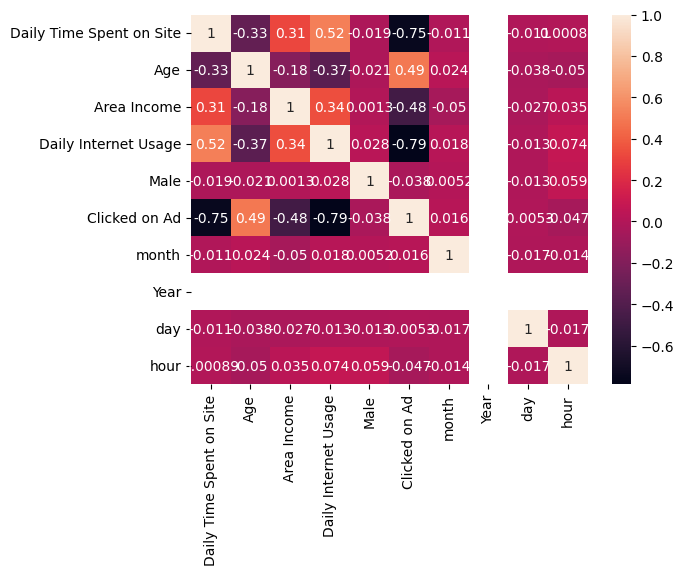

In [17]:
plt.Figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x=pd.DataFrame(x_scalar,columns=x.columns)

In [20]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,month,Year,day,hour
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,-0.424193,0.0,1.319174,-1.675896
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0.095015,0.0,-1.315508,-1.532166
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,-0.424193,0.0,-0.284546,1.198711
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,-1.462610,0.0,-0.628200,-1.388436
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,1.133432,0.0,-1.430060,-1.244705


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=100)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model=LogisticRegression()


In [25]:
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=model.predict(x_test)

In [28]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
accuracy_score(y_test,y_pred)

0.964

<Axes: >

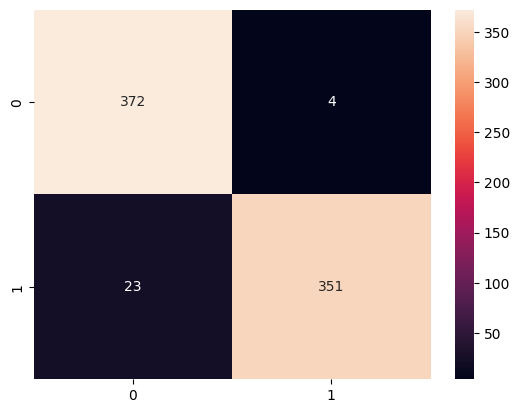

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [34]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       376
           1       0.99      0.94      0.96       374

    accuracy                           0.96       750
   macro avg       0.97      0.96      0.96       750
weighted avg       0.97      0.96      0.96       750

